#구상
1. input으로 받기
2. 이걸 각각 리스트의 요소끼리 비교해야 하니까 그러면 int형으로 만들어라
3. 이걸하고 반복문으로 각 요소 비교하기.
4. 이때 우리는 index함수를 사용해야 한다.

#1트

input으로 받기

In [ ]:
A = int(input())
B = input().split()
C = int(input())
D = input().split()

print("상근이의 카드 갯수:",A)
print("상근이의 카드:",B)
print("비교의 카드 갯수:",C)
print("비교 카드:",D)

5
6 3 2 10 -10
8
10 9 -5 2 3 4 5 -10
상근이의 카드 갯수: 5
상근이의 카드: ['6', '3', '2', '10', '-10']
비교의 카드 갯수: 8
비교 카드: ['10', '9', '-5', '2', '3', '4', '5', '-10']


이걸 각각 리스트의 요소끼리 비교해야 하니까 그러면 int형으로 만들어라

In [ ]:
B = list(map(int,B))
D = list(map(int,D))

print("상근이의 카드:",B)
print("비교 카드:",D)


상근이의 카드: [6, 3, 2, 10, -10]
비교 카드: [10, 9, -5, 2, 3, 4, 5, -10]


이걸하고 반복문으로 각 요소 비교하기.

----> index함수 사용

In [ ]:
for i in B:
  if i in D:
    D[D.index(i)] = 1
  else:
    pass

for i in D:
  if i != 1:
    D[D.index(i)] = 0
  else:
    pass
print(*D)

1 0 0 1 1 0 0 1


시간 초과로 막힘. 출력을 좀 달리해서 해결해보자.

import sys를 사용할 것

#2트

sys는 코랩에서 구현이 x 참고할 것

In [ ]:
import sys
A = sys.stdin.readline()
B = list(map(int,sys.stdin.readline().split()))

#출력 ok

In [ ]:
import sys
A = sys.stdin.readline()
B = list(map(int,sys.stdin.readline().split()))
C = sys.stdin.readline()
D = list(map(int,sys.stdin.readline().split()))

for i in B:
  if i in D:
    D[D.index(i)] = 1
  else:
    pass

for i in D:
  if i != 1:
    D[D.index(i)] = 0
  else:
    pass
print(*D)

여전히 시간 초과. 이진 탐색 알고리즘에 대해 좀 더 알아보고 시도해보자.

#3트

##이진 탐색(중간값에 따라 배열을 지우는 것)

순차 탐색: 리스트 안에 있는 특정한 데이터를 찾기 위해 앞에서부터 데이터를 하나씩 확인하는 방법.

이진 탐색: 정렬되어 있는 리스트에서 탐색 범위를 절반씩 좁혀가며 데이터를 탐색하는 방법

-**시작점, 끝점, 중간점**을 이용해서 탐색 범위를 설정한다.

예제1) 

**0 2 4 6 8 10 12 14 16 18**

의 카드 배열이 있다고 하자.

이때 우리는 4가 존재하는지 아닌지 알고 싶다.

이때 우리는 시작점, 끝점, 중간점을 지정해야 한다.

여기서는 0이 0번째 인덱스로 시작점, 8이 4번째 인덱스로 중간점(만일 짝수개라 중간값이 2개면 앞에 있는 인덱스가 중간값), 18이 9번쨰 인덱스라고 한다. 

아때 우리가 구하고자 하는 4는 중간값 8보다 작기때문에 8부터 18까지를 탐색할 필요가 없다.

따라서 우리는 배열을 **0 2 4 6**으로 줄일 수 있다.

여기서 다시 이진 탐색을 실시하면 0은 시작값, 2는 중간값, 6은 끝값이다.

그럼 이때 4는 중간값 2보다 크니까 우리는 **4 6**으로 배열을 줄일 수 있다.

이런식으로 찾은 수를 중간값에 따라 배열을 지우는 것이 이진탐색 알고리즘이다.

단계마다 탐색 범위를 2로 나누는 것이 동일하다. 즉 연산 횟수는  logN에 비례한다.

즉 예를 들어 초기 데이터가 32일때, 이상적으로 1단계를 거치면, 16개 가량의 데이터만 남는다.

2단계는 8, 3단계는 4

즉 이진탐색은 탐색범위를 절반씩 줄이며, 시간복잡도는 0을 보장한다.

###이진탐색 소스코드 (재귀적 구현)

In [ ]:
#배열, 찾고자 하는 값, 시작점, 끝점을 각각 의미
def binary_search(array,target,start,end):
 #시작점이 끝점보다 크다면 당연히 값은 애초에 존재하지 않는다. 
  if start > end:
    return None
 #중간값을 구해야지   
  mid = (start+end) // 2
#만약 중간값이 값이라면 바로 리턴
  if array[mid] == target:
    return mid
#중간값이 찾고자 하는 값보다 작은 경우, 왼쪽확인. 따라서 중간값보다 1작은 값까지 탐색해야 한다.
  elif array[mid] > target:
    return binary_search(array, target,start,mid-1)
#중간값이 찾고자 하는 값보다 큰 경우, 오른쪽확인. 따라서 중간값보다 1큰 값까지 탐색해야 한다.
  else:
    return binary_search(array,target,start,mid+1,end)
#n(원소의 갯수)와 target(찾고자 하는 값)을 입력 받기
n,target = list(map(int,input().split()))
#전체 원소 입력 받기
array = list(map(int,input().split()))
#이진 탐색 수행 결과 출력
result = binary_search(array,target,0,n-1)
if result == None:
  print("원소가 존재하지 않는다.")
else:
#인덱스의 순서가 0,1,2이기 때문에 순서를 정확히 구하기 위해서 +1
  print(result + 1)

###이진탐색 소스코드 (반복문 구현)

In [ ]:
#배열, 찾고자 하는 값, 시작점, 끝점을 각각 의미
def binary_search(array,target,start,end):
 #시작점이 끝점보다 크다면 당연히 값은 애초에 존재하지 않는다. 
  while start <= end:
 #중간값을 구해야지   
    mid = (start+end) // 2
#만약 중간값이 값이라면 바로 리턴
  if array[mid] == target:
    return mid
#중간값이 찾고자 하는 값보다 작은 경우, 왼쪽확인. 따라서 중간값보다 1작은 값까지 탐색해야 한다.
  elif array[mid] > target:
    end = mid-1
#중간값이 찾고자 하는 값보다 큰 경우, 오른쪽확인. 따라서 중간값보다 1큰 값까지 탐색해야 한다.
  else:
    start = mid + 1
  return None
#n(원소의 갯수)와 target(찾고자 하는 값)을 입력 받기
n,target = list(map(int,input().split()))
#전체 원소 입력 받기
array = list(map(int,input().split()))
#이진 탐색 수행 결과 출력
result = binary_search(array,target,0,n-1)
if result == None:
  print("원소가 존재하지 않는다.")
else:
#인덱스의 순서가 0,1,2이기 때문에 순서를 정확히 구하기 위해서 +1
  print(result + 1)

#파이썬 이진 탐색 라이브러리

bisect_left(a,x) : 정렬을 유지하면서, 배열 a에 x를 삽입할 가장 왼쪽 인덱스를 반환

bisect_right(a,x) : 정렬을 유지하면서, 배열 a에 x를 삽입할 가장 오른쪽 인덱스를 반환



**1,2,4,4,8**의 배열이 있다고 하면 
x=4라고 하자. 그럼 인덱스 2가 가장 왼쪽 인덱스

오른쪽은 8이 가장 오른쪽 인덱스

In [ ]:
from bisect import bisect_left,bisect_right

In [ ]:
a = [1,2,4,4,8]

x = 4

print(bisect_left(a,x))
print(bisect_right(a,x))

2
4


###파이썬 이진 탐색 라이브러리를 이용한 데이터 개수 구하기

In [ ]:
from bisect import bisect_left,bisect_right

#해당 값에 포함이 된 데이터의 갯수를 구하기 위해 빼기를 해준다.
def count_by_range(a,left_value,right_value):
  right_index = bisect_right(a,right_value)
  left_index = bisect_left(a,left_value)
  return right_index - left_index

#배열 선언
a = [1,2,3,3,3,4,4,8,9]

#깂이 4인 데이터의 갯수 출력
print(count_by_range(a,4,4))
#값이 [-1,3] 범위에 속하는 데이터 개수 출력
print(count_by_range(a,-1,3))

2
5


###파라메트릭 서치

최적화 문제를 결정 문제로 바꾸어 해결하는 기법입니다.

일반적으로 이진탐색을 사용해서 해결할 수 있다.

즉 현재 이높이로 자르면 조건을 만족할 수 있는가?를 확인한 뒤에 조건의 만족여부에 따라서 탐색 범위를 좁혀서 해결할 수 있습니다.

# 이진분류를 이용한 구상

1. input받기
2. 두번째에 대해서 반복문으로 받기
3. 그 받은 숫자가 네번째 리스트에 존재하는지 이진탐색을 통해 찾기

input받기

In [ ]:
A = int(input())
B = input().split()
C = int(input())
D = input().split()

print("상근이의 카드 갯수:",A)
print("상근이의 카드:",B)
print("비교의 카드 갯수:",C)
print("비교 카드:",D)

5
6 3 2 10 -10
8
10 9 -5 2 3 4 5 -10
상근이의 카드 갯수: 5
상근이의 카드: ['6', '3', '2', '10', '-10']
비교의 카드 갯수: 8
비교 카드: ['10', '9', '-5', '2', '3', '4', '5', '-10']


In [ ]:
B = list(map(int,B))
D = list(map(int,D))

print("상근이의 카드:",B)
print("비교 카드:",D)


상근이의 카드: [6, 3, 2, 10, -10]
비교 카드: [10, 9, -5, 2, 3, 4, 5, -10]


두번째에 대해서 반복문으로 받기

In [ ]:
for i in B:
  print(i)

6
3
2
10
-10


그 받은 숫자가 네번째 리스트에 존재하는지 이진탐색을 통해 찾기

In [ ]:
def bi(array,target,start,end):
  while start < end:
    mid = (start + end) // 2
    if array[mid] == target:
      return mid
    elif array[mid] > target:
      end = mid - 1
    else:
      start = mid + 1
  return None

for i in B:
  result = bi(D,i,0,C-1)
  if result == None:
    D[B.index(i)] = 0
  else:
   D[B.index(i)] = 1
print(D)

[0, 0, 1, 0, 0, 4, 5, -10]


왜 틀린거지......

https://pythontutor.com/render.html#mode=display

돌려

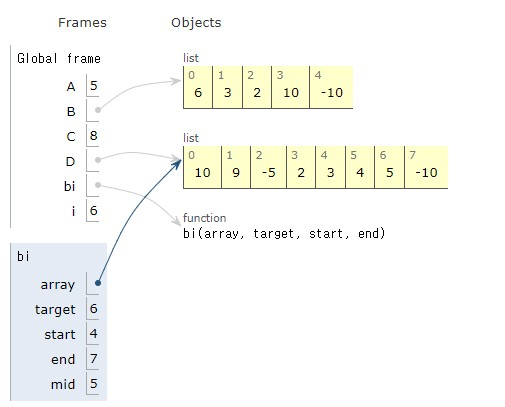

이거 리스트 D를 정렬하고 돌려야함.
그래서 모든 리스트 D가 돌아가지 않고 일부만 돌아간거임.

#4트

In [ ]:
A = int(input())
B = input().split()
C = int(input())
D = input().split()

print("상근이의 카드 갯수:",A)
print("상근이의 카드:",B)
print("비교의 카드 갯수:",C)
print("비교 카드:",D)

5
6 3 2 10 -10
8
10 9 -5 2 3 4 5 -10
상근이의 카드 갯수: 5
상근이의 카드: ['6', '3', '2', '10', '-10']
비교의 카드 갯수: 8
비교 카드: ['10', '9', '-5', '2', '3', '4', '5', '-10']


In [ ]:
B = list(map(int,B))
D = list(map(int,D))
D = sorted(D)
print("상근이의 카드:",B)
print("비교 카드:",D)

상근이의 카드: [6, 3, 2, 10, -10]
비교 카드: [-10, -5, 2, 3, 4, 5, 9, 10]


In [50]:
A = int(input())
B = list(map(int, input().split()))
C = int(input())
D = input().split()

D = list(map(int,D))
F = sorted(D)

def bi(array,target,start,end):
  while start <= end:
    mid = (start + end) // 2
    if array[mid] == target:
      return mid
    elif array[mid] > target:
      end = mid - 1
    else:
      start = mid + 1
  return None
E = []
for i in B:
  result = bi(F,i,0,C-1)
  if result == None:
    pass
  else:
    E.append(i)

for i in D:
  if i in E:
    D[D.index(i)] = 1
  else:
    pass
for i in D:
  if i != 1:
    D[D.index(i)] = 0
  else:
    pass
print(*D)


5
6 3 2 10 -10
8
10 9 -5 2 3 4 5 -10
1 0 0 1 1 0 0 1


시간 초과;;;;

# 5트

In [51]:
A = int(input())
B = list(map(int, input().split()))
C = int(input())
D = input().split()

D = list(map(int,D))
F = sorted(D)

def bi(array,target,start,end):
  while start <= end:
    mid = (start + end) // 2
    if array[mid] == target:
      return 1
    elif array[mid] > target:
      end = mid - 1
    else:
      start = mid + 1
  return 0
E = []
for i in B:
  result = bi(F,i,0,C-1)
  print(result)


5
6 3 2 10 -10
8
10 9 -5 2 3 4 5 -10
None
3
2
7
0


In [52]:
A = int(input())
B = list(map(int, input().split()))
C = int(input())
D = input().split()

D = list(map(int,D))
F = sorted(D)

def bi(array,target,start,end):
  while start <= end:
    mid = (start + end) // 2
    if array[mid] == target:
      return 1
    elif array[mid] > target:
      end = mid - 1
    else:
      start = mid + 1
  return 0
E = []
for i in B:
  result = bi(F,i,0,C-1)
  E.append(result)
print(E)


5
6 3 2 10 -10
8
10 9 -5 2 3 4 5 -10
[0, 1, 1, 1, 1]


이전에 이런 시도를 했지만 내가 이전코드와 햇갈려서 이걸 인지하지 못함. 앞으로는 새로 코드를 짜면 트라이 별로 확실히 구분해놓자.

출력 초과를 해결하기 위해 sys 사용

앞에서 기준을e로 잡을때 [0, 1, 1, 1, 1]라고 나온다.

이번에는 B를 기준으로 잡자.

In [ ]:
import sys

def binary_search(array, target, start, end):
    while start <= end:
        mid = (start + end) // 2

        if array[mid] == target:
            return 1
        elif array[mid] > target:
            end = mid - 1
        else:
            start = mid + 1
    return 0

n = int(input())
card = list(map(int, sys.stdin.readline().split()))
m = int(input())
check = list(map(int, sys.stdin.readline().split()))

card.sort()


for i in range(m):
    print(binary_search(card, check[i], 0, n - 1), end=' ')